In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import visualkeras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers, models, Sequential
from sklearn.preprocessing import OneHotEncoder

## Get data train and val

In [2]:
data = pd.read_json("../raw_data/splits/train.json")
dataval = pd.read_json("../raw_data/splits/val.json")
datatest = pd.read_json("../raw_data/splits/test.json")

In [3]:
data = data.T
dataval = dataval.T
datatest = datatest.T

In [4]:
data

,author,barcode,country,dec_lat,dec_long,family,genus,image_name,image_path,infraspecific_epithet,primary_division,specific_epithet,subfamily,subspecific_epithet,token
0000e73d-4d1e-4241-a577-88103fc0961c,"(Mayer, 1851)",ETHZ-ENT0012714,Switzerland,46.31,7.8,Pieridae,Pieris,ETHZ_ENT01_2017_04_03_010614.JPG,2017_04_03R,None,Valais,mannii,Pierinae,None,0000e73d-4d1e-4241-a577-88103fc0961c
000156fb-6f29-4057-b26f-eca7ce9e9460,"(Hübner, 1806)",ETHZ-ENT0015323,Switzerland,46.76594,9.89316,Pieridae,Pieris,ETHZ_ENT01_2017_04_07_013503.JPG,2017_04_07R,None,Grisons,bryoniae,Pierinae,None,000156fb-6f29-4057-b26f-eca7ce9e9460
00025400-f7bd-477b-9363-18defd2d5466,"(Linnaeus, 1767)",ETHZ-ENT0019906,Morocco,30.2804,-9.1599,Lycaenidae,Leptotes,ETHZ_ENT01_2017_04_24_018779.JPG,2017_04_24R,None,Souss-Massa,pirithous,Polyommatinae,None,00025400-f7bd-477b-9363-18defd2d5466
0006c590-29cd-4a3d-8d81-26023ac346a0,"(Rottemburg, 1775)",ETHZ-ENT0013615,Switzerland,47.37659,7.740225,Nymphalidae,Melitaea,ETHZ_ENT01_2017_04_06_012762.JPG,2017_04_06R,None,Basel-Landschaft,athalia,Nymphalinae,None,0006c590-29cd-4a3d-8d81-26023ac346a0
000b01ec-1bc7-4a3c-8599-0ad88fa654e3,"(Denis & Schiffermüller, 1775)",ETHZ-ENT0042254,Switzerland,47.36836,7.73113,Nymphalidae,Erebia,ETHZ_ENT01_2017_06_13_043879.JPG,2017_06_13R,None,Basel-Landschaft,medusa,Satyrinae,None,000b01ec-1bc7-4a3c-8599-0ad88fa654e3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14ce36f1-427c-11ea-871b-887873dd81ef,"Bremer, 1864",ETHZ-ENT0012306,Russia,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010161.JPG,2017_03_31R,None,Primorsky,wanga,Satyrinae,None,14ce36f1-427c-11ea-871b-887873dd81ef
14ce36f2-427c-11ea-91d2-887873dd81ef,"Butler, 1868",ETHZ-ENT0012301,Spain,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010156.JPG,2017_03_31R,None,Andalusia,hispania,Satyrinae,None,14ce36f2-427c-11ea-91d2-887873dd81ef
14ce36f3-427c-11ea-ab8b-887873dd81ef,"(Gerhard, 1850)",ETHZ-ENT0013111,Turkey,None,None,Lycaenidae,Lycaena,ETHZ_ENT01_2017_04_04_011035.JPG,2017_04_04R,None,None,asabinus,Lycaeninae,None,14ce36f3-427c-11ea-ab8b-887873dd81ef
14ce36f4-427c-11ea-a529-887873dd81ef,"(Klug, 1832)",ETHZ-ENT0039040,Palestine,None,None,Nymphalidae,Ypthima,ETHZ_ENT01_2017_06_06_040263.JPG,2017_06_06R,None,Jericho,asterope,Satyrinae,None,14ce36f4-427c-11ea-a529-887873dd81ef


## Data preprocessing (feature creation)

In [5]:
data['species'] = data['genus']+'_'+data['specific_epithet']
dataval['species'] = dataval['genus']+'_'+dataval['specific_epithet']
datatest['species'] = datatest['genus']+'_'+datatest['specific_epithet']

In [6]:
data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
dataval["path_to_image"]="../raw_data/IMG/"+dataval["image_name"]
datatest["path_to_image"]="../raw_data/IMG/"+datatest["image_name"]

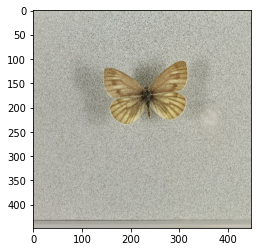

In [7]:
img = Image.open(data["path_to_image"][1])
plt.imshow(img)

In [8]:
datasample = data.sample(1000,random_state = 818)
datavalsample = dataval.sample(200,random_state = 818)
datatestsample = datatest.sample(200,random_state = 818)

# Pixellib

## Import

In [9]:
import pixellib
from pixellib.instance import custom_segmentation
segment_image =custom_segmentation()
segment_image.inferConfig(num_classes= 1, class_names= ["BG", "butterfly"])

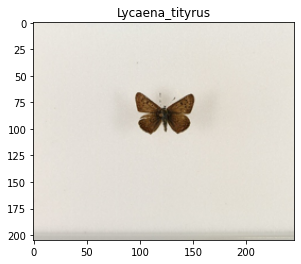

In [10]:
for i in datasample['path_to_image'] :
    img = Image.open(datasample['path_to_image'][0])
    img = img.resize((246,205))
plt.title(datasample['species'][0])
plt.imshow(img)

In [11]:

# DL model : https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.0.0/Nature_model_resnet101.h5
segment_image.load_model("../raw_data/Nature_model_resnet101.h5")

segment_image.segmentImage(img, show_bboxes=True, 
                           output_image_name='../raw_data/test_crop.jpg',
                          extract_segmented_objects= True, 
                           save_extracted_objects=True)

Instructions for updating:
Use fn_output_signature instead


2021-08-25 14:29:29.247331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 14:29:29.386102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64
2021-08-25 14:29:29.386123: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


ValueError: Layer #391 (named "mrcnn_bbox_fc"), weight <tf.Variable 'mrcnn_bbox_fc/kernel:0' shape=(1024, 8) dtype=float32> has shape (1024, 8), but the saved weight has shape (1024, 12).

In [ ]:
target_classes = segment_image.select_target_classes(but=True, bicycle = True)

In [ ]:
img

In [12]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.load_model("../raw_data/mask_rcnn_coco.h5")
segment_image.inferConfig(num_classes= 1, class_names= ["BG", "butterfly"])
segment_image.segmentImage(img,
                           extract_segmented_objects=True,
                           save_extracted_objects=True, 
                           show_bboxes=True,  output_image_name="../raw_data/output.jpg")

AttributeError: 'custom_segmentation' object has no attribute 'config'

In [ ]:
target_classes = segment_image.select_target_classes(person=True)

In [ ]:
segment_image.segmentImage("sample.jpg", segment_target_classes=target_classes, extract_segmented_objects=True,save_extracted_objects=True, show_bboxes=True,  output_image_name="output.jpg")

In [ ]:
import pixellibfrom pixellib.instance 
import instance_segmentation
segment_image=instance_segmentation()
segment_image.load_model(“mask_rcnn_coco.h5”)

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("mask_rcnn_coco.h5")
segment_image.segmentImage("sample.jpg", extract_segmented_objects=True,
save_extracted_objects=True, show_bboxes=True,  output_image_name="output.jpg")

### Custom training

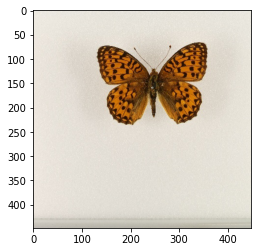

In [38]:
plt.imshow(Image.open(data['path_to_image'][15]))

In [16]:
type(img)

PIL.Image.Image

In [44]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG", "butterfly", "car"])
segment_image.load_model("../raw_data/Nature_model_resnet101.h5")
segmask, output15 = segment_image.segmentImage("../raw_data/butterfly.jpg", show_bboxes=True, 
                           output_image_name="../raw_data/sample_outinit.jpg",
                                            extract_segmented_objects= True)


Processed image saved successfully in your current working directory.


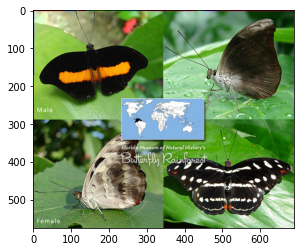

In [45]:
# convert BGR to RGB
plt.imshow(output15[:, :, ::-1])

In [ ]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG", "butterfly", "squirrel"])
segment_image.load_model("mask_rcnn_models/Nature_model_resnet101.h5")
segment_image.segmentImage("sample1.jpg", show_bboxes=True, output_image_name="sample_out.jpg")


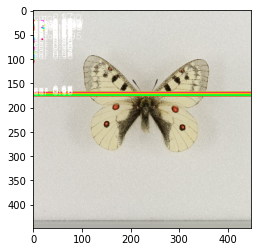

In [36]:
plt.imshow(output11[:, :, ::-1])

In [47]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("../raw_data/mask_rcnn_coco.h5")
segmask, output_IS = segment_image.segmentImage("../raw_data/butterfly.jpg", extract_segmented_objects=True,
save_extracted_objects=True, show_bboxes=True,  output_image_name="output.jpg")

2021-08-25 15:10:03.954021: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.


Processed image saved successfully in your current working directory.


error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgcodecs/src/loadsave.cpp:803: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [1]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2, batch_size = 4)
train_maskrcnn.load_pretrained_model("../raw_data/mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("Nature")
train_maskrcnn.train_model(num_epochs = 300, augmentation=True,  
                           path_trained_models = "mask_rcnn_models")


2021-08-25 11:44:54.057971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 11:44:54.057991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Using resnet101 as network backbone For Mask R-CNN model


2021-08-25 11:45:17.750105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 11:45:17.750486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 11:45:17.750558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-08-25 11:45:17.750614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-08-25 11:45:17.750671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Applying Default Augmentation on Dataset
Train 0 images
Validate 0 images
Checkpoint Path: /home/schiryn/code/Em3line/Butterfly_identification/notebooks/mask_rcnn_models
Selecting layers to train
Epoch 1/300


KeyboardInterrupt: 